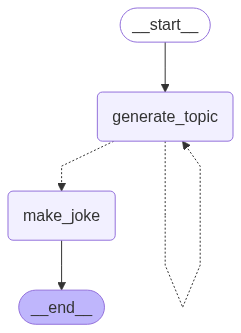

adding topic!
adding topic!
adding topic!
adding topic!
hilarious joke about topic2
hilarious joke about topic3
hilarious joke about topic1
hilarious joke about topic4


{'topics': ['topic1', 'topic2', 'topic3', 'topic4']}

In [ ]:
from typing_extensions import Annotated
from pydantic import BaseModel
from typing import List
from operator import add
from langgraph.types import Send, Command
from langgraph.graph import StateGraph, START
from IPython.display import Image, display
from typing import Literal
from langgraph.store.postgres import AsyncPostgresStore


class State(BaseModel):
    topics: Annotated[List[str], add]


class JokeState(BaseModel):
    topic: str


# node to generate topics
def generate_topic(state: State) -> Command[Literal["generate_topic", "make_joke"]]:
    if len(state.topics) <= 3:
        print("adding topic!")
        return Command(
            update=State(topics=[f"topic{len(state.topics) + 1}"]),
            goto="generate_topic",
        )
    else:
        return Command(
            goto=[Send("make_joke", JokeState(topic=topic)) for topic in state.topics]
        )


# node to make jokes
def make_joke(state: JokeState):
    print(f"hilarious joke about {state.topic}")


builder = StateGraph(State)
builder.add_node("generate_topic", generate_topic)
builder.add_node("make_joke", make_joke)
builder.add_edge(START, "generate_topic")

graph = builder.compile()

# display the graph
display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke(State(topics=[]))